In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#file_location

file_location = r'F:\data Immersion\Preparing and Analzing Data\Raw\Advanced Analytics & Dashboard Design(Achievement 6)\Final report'

In [4]:
# Importing housing data

df = pd.read_csv(os.path.join(file_location, '02 Data', 'ready Data', 'US_AQI_clean_2.csv'))

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CBSA Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Number of Sites Reporting', 'city_ascii',
       'state_name', 'latitude', 'longitude', 'population', 'density',
       'timezone', 'density_flag'],
      dtype='object')

## Extreme values checks

C:\Users\adi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

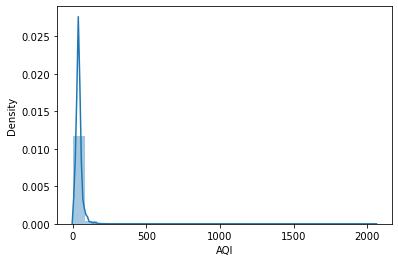

In [6]:
# Shows extreme values

sns.distplot(df['AQI'], bins=25) 


In [7]:
 # Check the mean
df['AQI'].mean()

41.17570416994492

In [8]:
# Cheak the median
df['AQI'].median()

39.0

In [9]:
# cheak the Max
df['AQI'].max()

2060

C:\Users\adi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

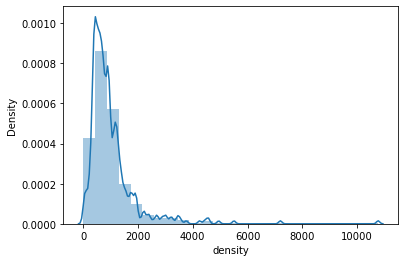

In [10]:
sns.distplot(df['density'], bins=25)

In [11]:
 # Check the mean
df['density'].mean()

1007.9103440383377

In [12]:
# Cheak the median
df['density'].median()

776.0

In [13]:
# Cheak the max
df['density'].max()

10768

C:\Users\adi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Sites Reporting', ylabel='Density'>

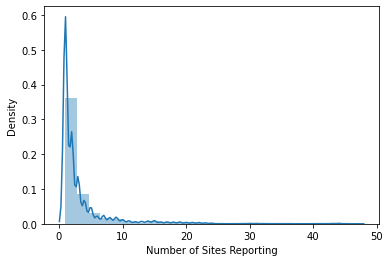

In [14]:
sns.distplot(df['Number of Sites Reporting'], bins=25)

In [15]:
# cheak the min
df['Number of Sites Reporting'].min()

1

In [16]:
# Cheak the median
df['Number of Sites Reporting'].median()

2.0

In [17]:
# cheak the max
df['Number of Sites Reporting'].max()

47

# Data prep for regression analysis (Density vs AQI )

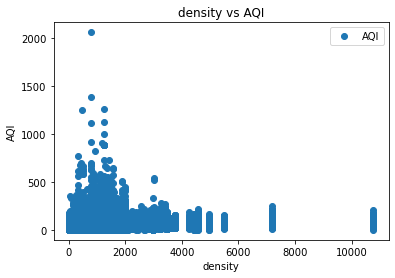

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'density', y='AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('density vs AQI')  
plt.xlabel('density')  
plt.ylabel('AQI')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['density'].values.reshape(-1,1)
y= df['AQI'].values.reshape(-1,1)

In [20]:
X

array([[588],
       [588],
       [588],
       ...,
       [817],
       [817],
       [817]], dtype=int64)

In [21]:
y

array([[21],
       [12],
       [18],
       ...,
       [58],
       [61],
       [34]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Hypothesis
# Density of States has no relationship  with Air quality Index

# Regression analysis

In [23]:
# Create a regression object.
regression = LinearRegression()

In [24]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

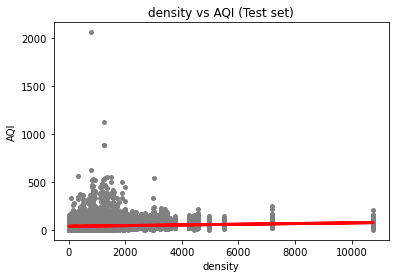

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('density vs AQI (Test set)')
plot_test.xlabel('density')
plot_test.ylabel('AQI')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00358027]]
Mean squared error:  475.59390006242126
R2 score:  0.0216970247554662


# Q11 Check the model performance statistics—MSE and R2.
The R2 score or R squared is a metric that shows how well the model explains the variance in the data. It’s a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. I would interpret the result as the fit is weak.

The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. It states how close a regression line is to a set of points. A small MSE means that the regression line passes fairly close to the observations, making it a good fit. I would interpret the result less than moderate MSE, so the linear regression line is not a fairly good fit for this analysis.

In [75]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12,38.043791
1,42,41.566777
2,28,40.166891
3,49,42.433203
4,3,42.708884
5,28,39.375651
6,36,40.238497
7,39,43.510864
8,58,40.392448
9,13,39.053427


# Q12 Compare the predicted y values with the actual y values in a dataframe

This output shows there is some differences between the actual and predicted values.

# Compare how the regression fits the training set

In [29]:
# Predict.
# This is predicting X_train!

y_predicted_train = regression.predict(X_train) 

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00358027]]
Mean squared error:  470.5211240352595
R2 score:  0.02320740740695304


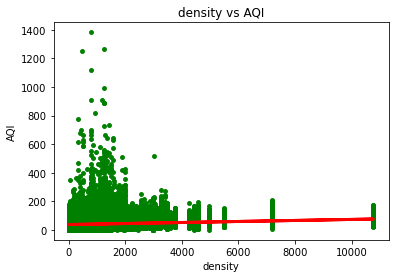

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('density vs AQI')
plot_test.xlabel('density')
plot_test.ylabel('AQI')
plot_test.show()

# Improving data quality by removing outliner

In [33]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['AQI'] <=50] 

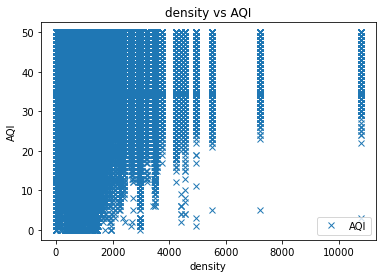

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_test.plot(x = 'density', y='AQI',style='x') 
plt.title('density vs AQI')  
plt.xlabel('density')  
plt.ylabel('AQI')  
plt.show()

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_test['density'].values.reshape(-1,1)
y_2= df_test['AQI'].values.reshape(-1,1)

In [37]:
# Split data into a training set and a test set.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [38]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [39]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [40]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00154913]]
Mean squared error:  118.73767689975371
R2 score:  0.014238634388425986


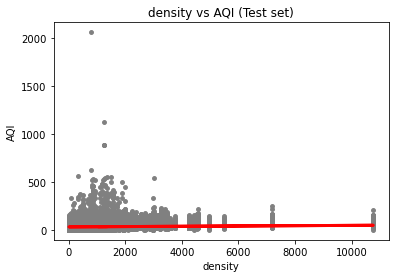

In [42]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('density vs AQI (Test set)')
plot_test.xlabel('density')
plot_test.ylabel('AQI')
plot_test.show()

In [48]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,46,33.522399
1,18,33.513104
2,47,33.804341
3,46,33.985589
4,40,33.231162
5,45,32.950769
6,44,32.815995
7,32,32.692065
8,25,32.662631
9,35,33.077798
